Hello! My name is Keshav and this is my attempt at developing an algorithm to accurately predict the onset of diabetes. The dataset I used was the "Pima Indians Diabetes Database".

**Context**: This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content**: The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# **1. Import**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# **2. Exploratory Data Analysis (EDA)**

In [3]:
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Examining the distribution of data, here are some potentially useful observations:
1. Each column has the same count
2. Insulin has the highest standard deviation with a significant difference from the minimum to the maximum
3. Many columns have a minimum of 0 which might indicate an incorrect dataset.
* Pregnancies: 0 is possible
* Glucose: Cannot be 0 (https://medlineplus.gov/ency/article/000386.htm)
* Blood Presure: While possible, extremely unlikely for 0 (https://www.nhlbi.nih.gov/health/low-blood-pressure)
* Skin Thickness: 0 is impossible
* Insulin: 0 is impossible (https://www.quora.com/What-happens-if-someone-has-zero-insulin)
* BMI: 0 is impossible (https://www.cdc.gov/healthyweight/assessing/bmi/index.html#:~:text=Body%20Mass%20Index%20(BMI)%20is,or%20health%20of%20an%20individual.)



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
print(df.isnull().sum().sum())

0


Since there are zero null values, we don't have to delete any rows right now. However, one way to account for the incorrect data values (the zeroes in glucose, blood pressure, skin thickness, insulin, BMI) is to make them null.

In [9]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Some important observations:
* Insulin has a significant number of null values, approximately half of its entire values (768). 
* Glucose and BMI have barely any null values (<2%)

Instead of plugging in the same measure of central tendency (mean, median, mode), it is important to map out the different distributions of each variable. 

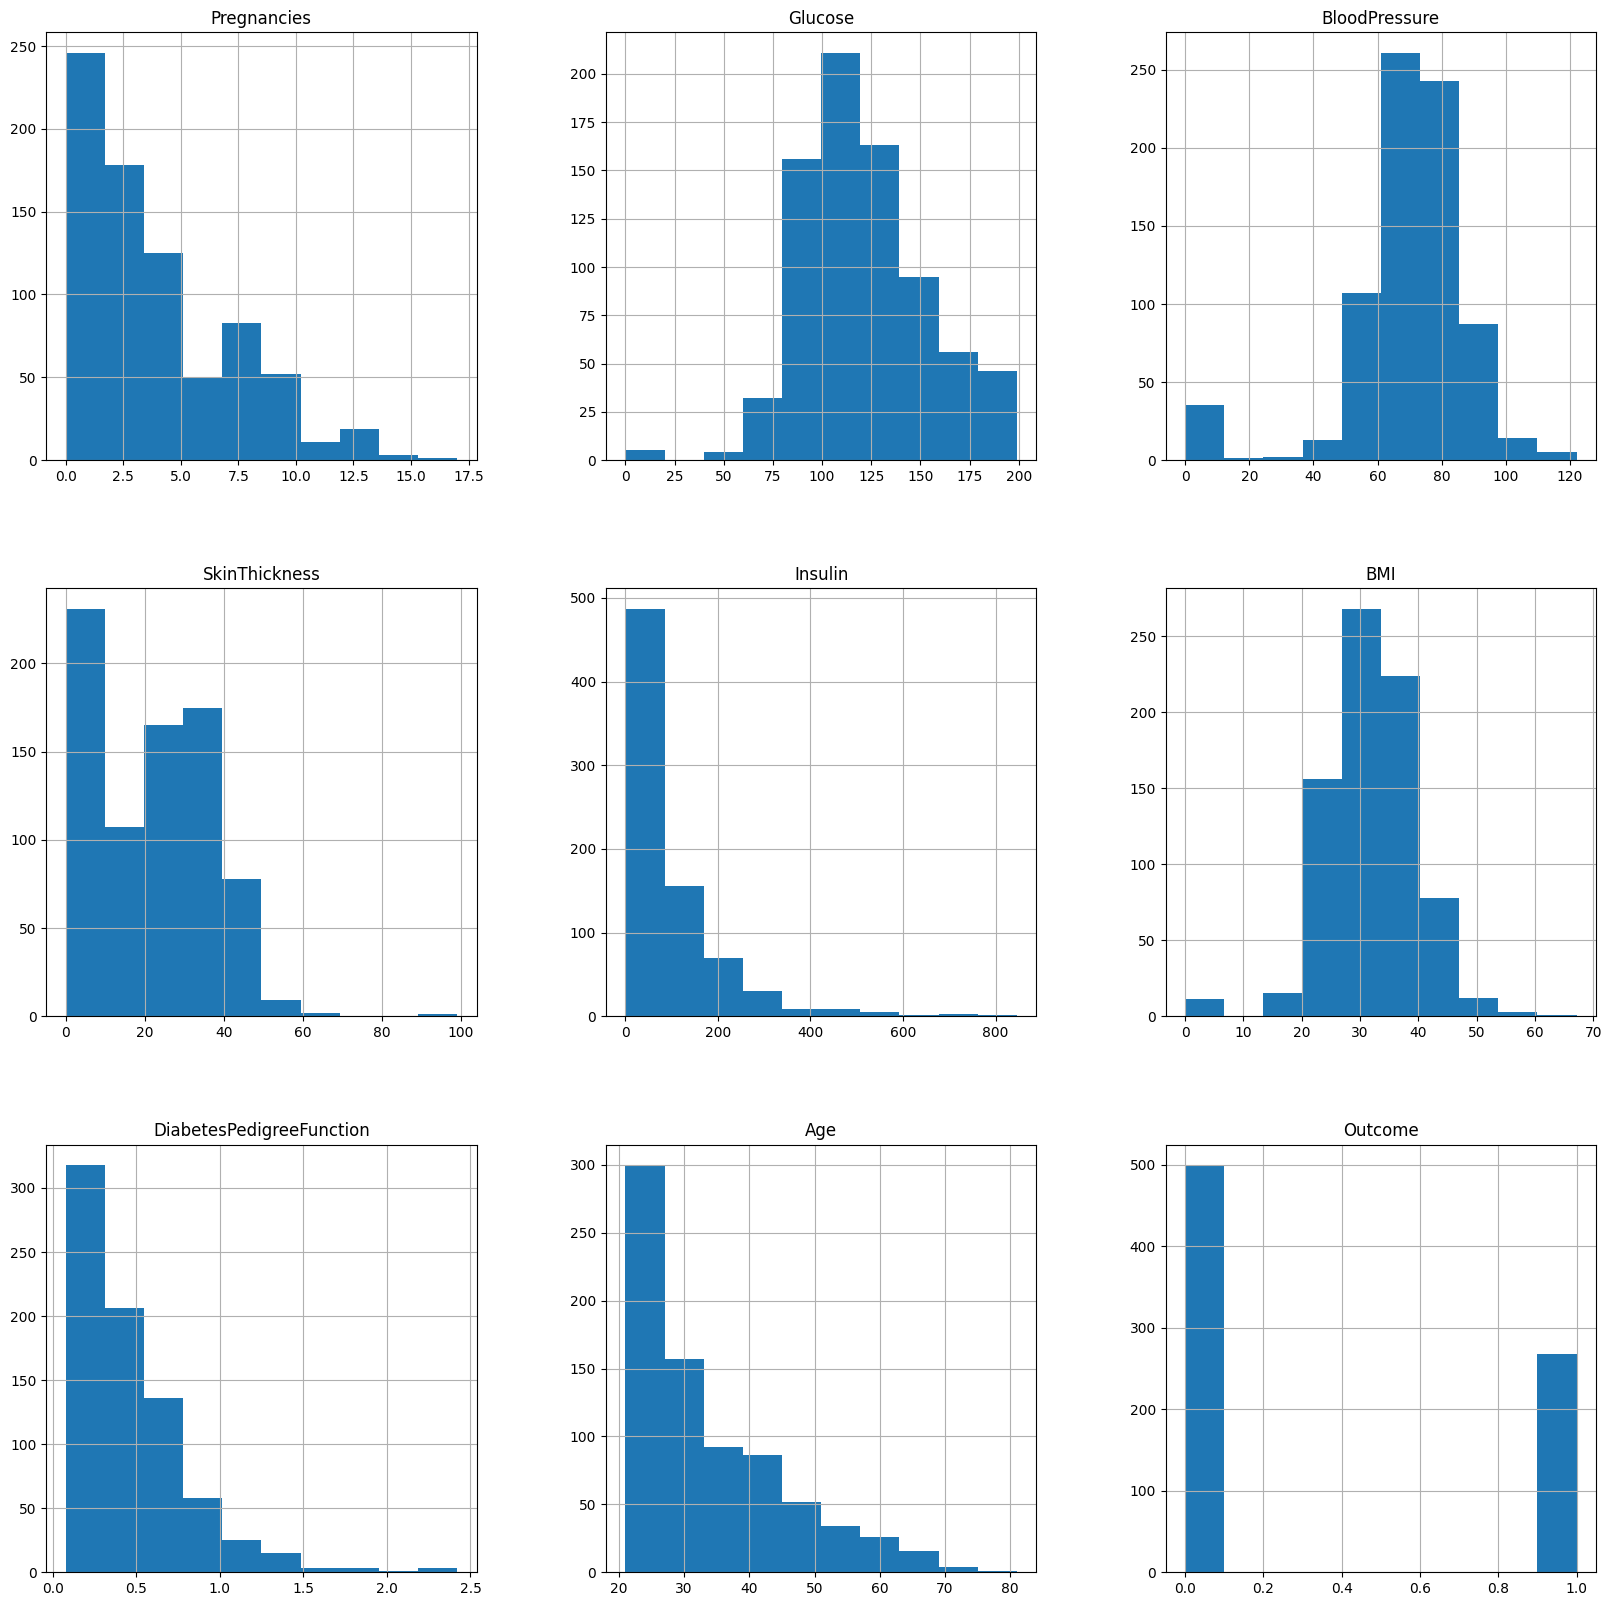

In [10]:
p = df.hist(figsize = (20,20))

The mean is preferrable to use when the data is symmetrically distributed, and the mean is preferrable to use when the data is unevenly distributed (or skewed) — learn more here: https://towardsdatascience.com/mean-or-median-choose-based-on-the-decision-not-the-distribution-f951215c1376#:~:text=“The%20mean%20is%20typically%20better,will%20be%20distorted%20by%20outliers.”)

Additionally, for characteristics that have a large amount of zeros, such as skin thickness or insulin, using the mean will dilute the data significantly, and instead the median should be used. 

In [11]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(), inplace = True)

/tmp/ipykernel_34/3648237320.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
/tmp/ipykernel_34/3648237320.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

Unsure how to fix an error on the above code segment. The output still runs and it seems as tho the fillna method doesn't accept a column as a parameter (see documentation here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

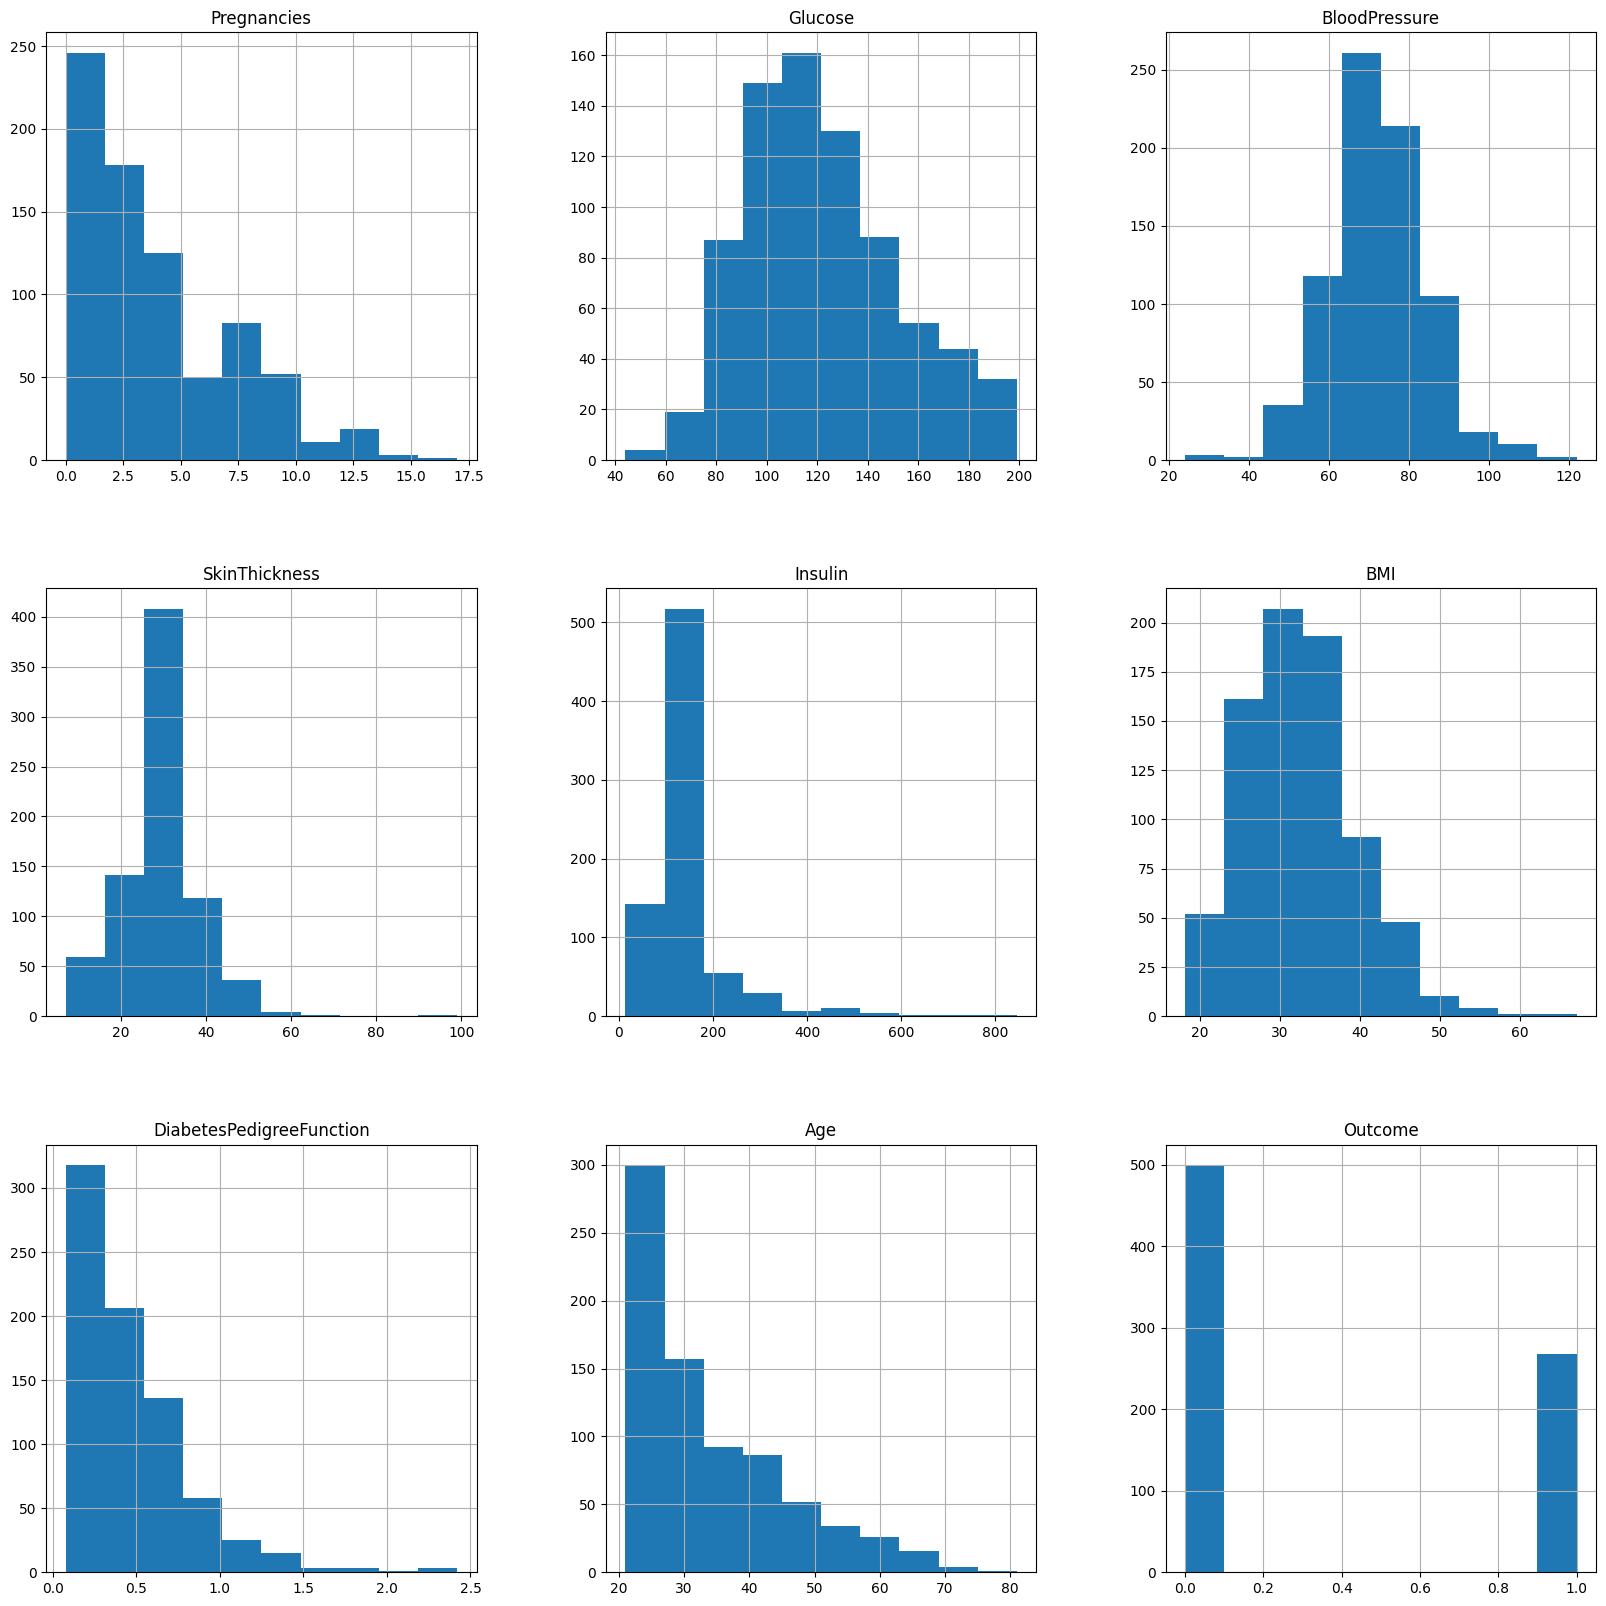

In [12]:
p2 = df_copy.hist(figsize = (20,20))

Great! Notice the lack of 0's in the graph and for some columns, such as insulin, a peak at the median/mean.

# **3. Data Visualization**

The next step is to evaluate the distribution of the outcome (which you can see a glimpse of in the above histogram!)

Outcome
0    500
1    268
Name: count, dtype: int64


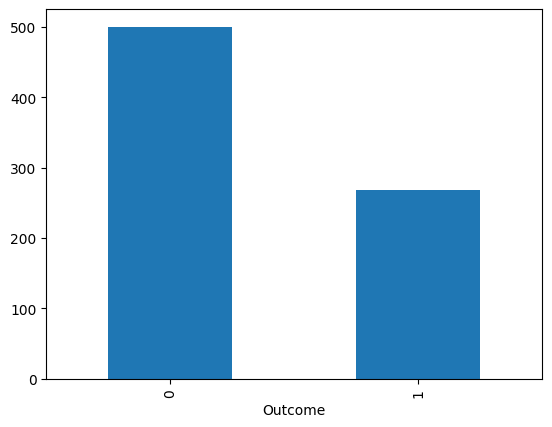

In [13]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

From this, we can see that there are approximately double the number of "0" outcomes than "1". To solve this, we could remove approximately half of the "0" outcomes, however, that would eliminate a rather large portion of the data.

To gain a better understanding of the overlap between different data categories, I plotted the data using a heatmap (from seaborn). 

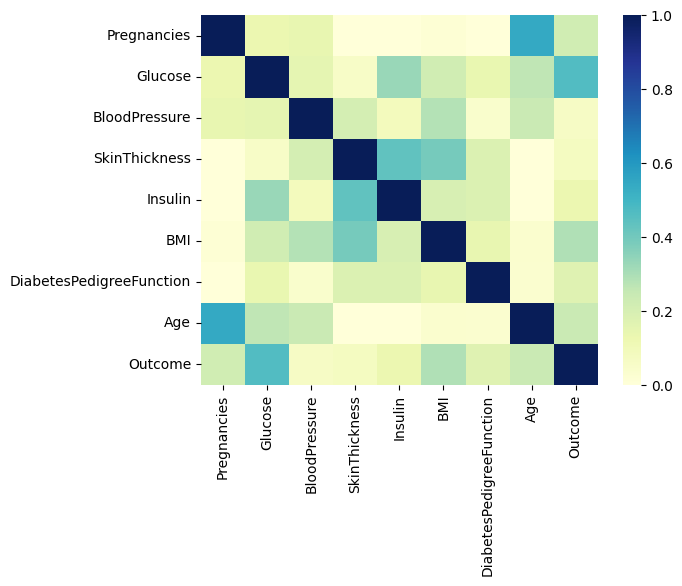

In [14]:
sns.heatmap(df.corr(), vmin=0, cmap="YlGnBu");

To compare the data cleaning I did above, I also plotted the heatmap of cleaned data.

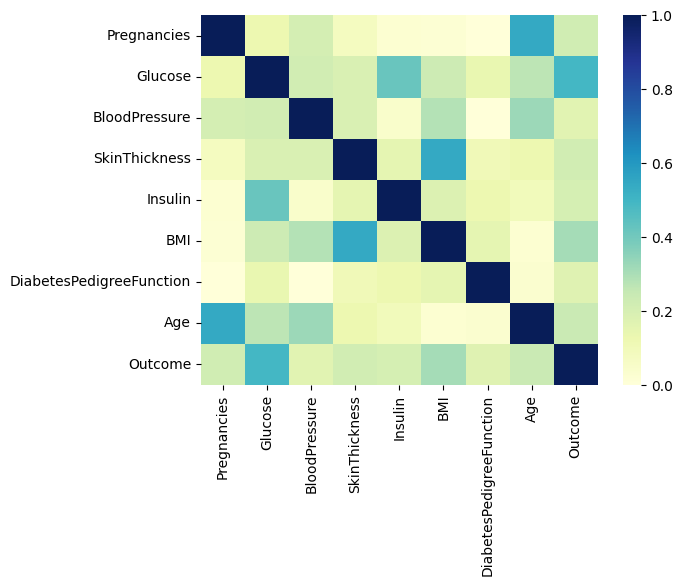

In [15]:
sns.heatmap(df_copy.corr(), vmin=0, cmap="YlGnBu");

# **4. Data Scaling**

The final step of cleaning the data is to scale it. This is important for certain models that provide weights for each parameter, and therefore, an algorithm might neglect parameters with smaller values. One prominent example is KNN, where larger, more distorted values could interfere with the distance calculations the algorithm uses to categorize different datapoints.

There are two primary types of data rescaling: Normalization and Standardization. 

Normalization rescales the data between 0 and 1, effective for algorithms that utilize distance measurement such as KNN and coefficients for regression.

Standarization shifts the distribution of the data such that the mean is zero and the data has a standard deviation of one, effective for standardizing attributions, often used in Guassian procceses. 

For this project, both approaches will be utilized.

To learn more, please check out: https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

In [16]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
stand_x =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [17]:
stand_x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496


In [18]:
# Normalization
from sklearn.preprocessing import Normalizer
no_X = Normalizer()
norm_x =  pd.DataFrame(no_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [19]:
norm_x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.027500,0.678333,0.330000,0.160417,0.572916,0.154000,0.002874,0.229167
1,0.005801,0.493082,0.382863,0.168228,0.725120,0.154306,0.002036,0.179830
2,0.033902,0.775519,0.271220,0.122896,0.529726,0.098741,0.002848,0.135610
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


In [20]:
# outcome for both standardization & normalization
y_val = df_copy.Outcome

# **5. Model Development**

With this information, we are ready to start training an algorithm. However, we need to split the data first which I did using the train_test_split from sklearn (learn more here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). For the test size, I chose .3 as it is commonly used and the random_state of 42 is also convention.

In [21]:
# try going back and forth between stand_x and rand_x to test the effect it has on different models
from sklearn.model_selection import train_test_split
x_val = stand_x 
# x_val = norm_x
x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.3, random_state=42)

### A. K-nearest neighbor (KNN)

KNN works on the principle of similarity. For a given data point, it looks at the 'K' closest data points, known as neighbors, to determine its classification or value. It's a method that assumes similar things exist in close proximity.

For more information: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
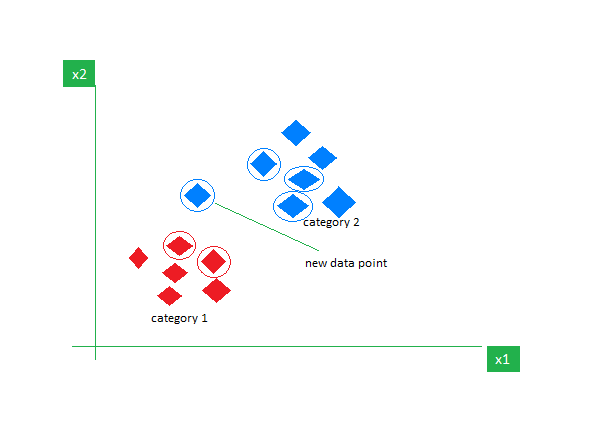

In [22]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

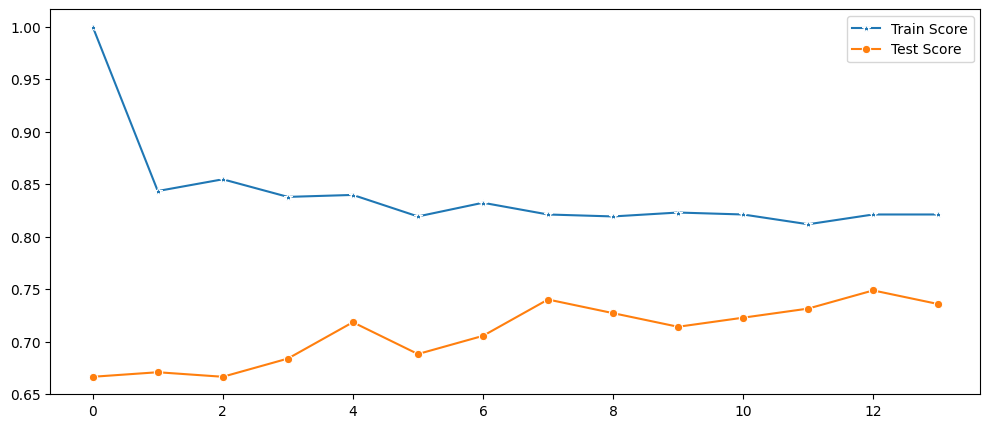

In [23]:
plt.figure(figsize=(12,5))
p = sns.lineplot(train_scores,marker='*',label='Train Score')
p = sns.lineplot(test_scores,marker='o',label='Test Score')

Looking at this graph, we pay special attention to the maximum of the orange line (the test score), as this is the value we wish to maximize. This score is maximized at 12 (this may change).

In [24]:
knn = KNeighborsClassifier(12)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [25]:
knn.score(x_test,y_test)

0.7316017316017316

### B. Logistic Regression

Logistic Regression predicts the probability that a data point belongs to a certain category. It is used for binary classification tasks (e.g., yes/no decisions) and works by applying a logistic function to a linear combination of features, transforming linear output into a probability.

For more information: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
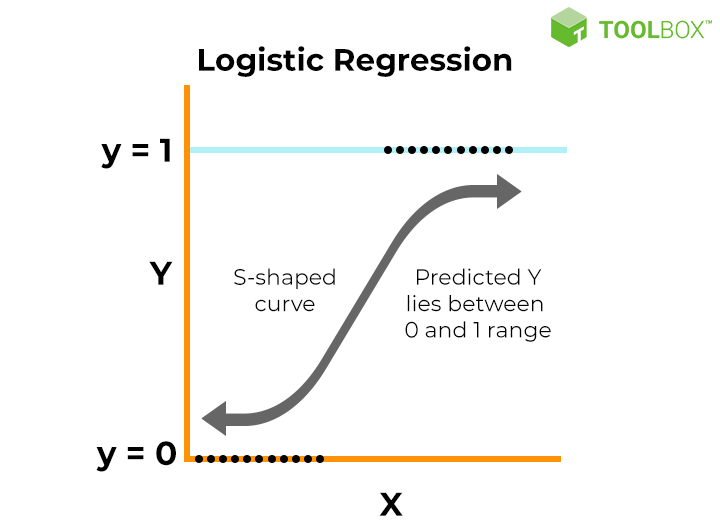

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=100, random_state=42)
lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [27]:
lr.score(x_test, y_test)

0.7402597402597403

### C. Decision Tree + Random Forest

An important consideration is whether to use a classifier or regressor, as both exist for Decision Tree and Random Forest.

Classifier is used for categorial outputs, often binaries such as "spam or not-spam" or "apple or orange".

Regressor is used for quantatative outputs, often numerical such as predicting price or amount.

Even though the output is represented as a number (0 or 1), it's binary and categorial nature suggest that a classifier is most appropriate.

A Decision Tree makes decisions by splitting data into branches at each level based on feature values. It resembles a flowchart, leading to a conclusion by asking a series of questions based on the features of the data, with each answer guiding the next question until a final prediction is made.

For more information: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
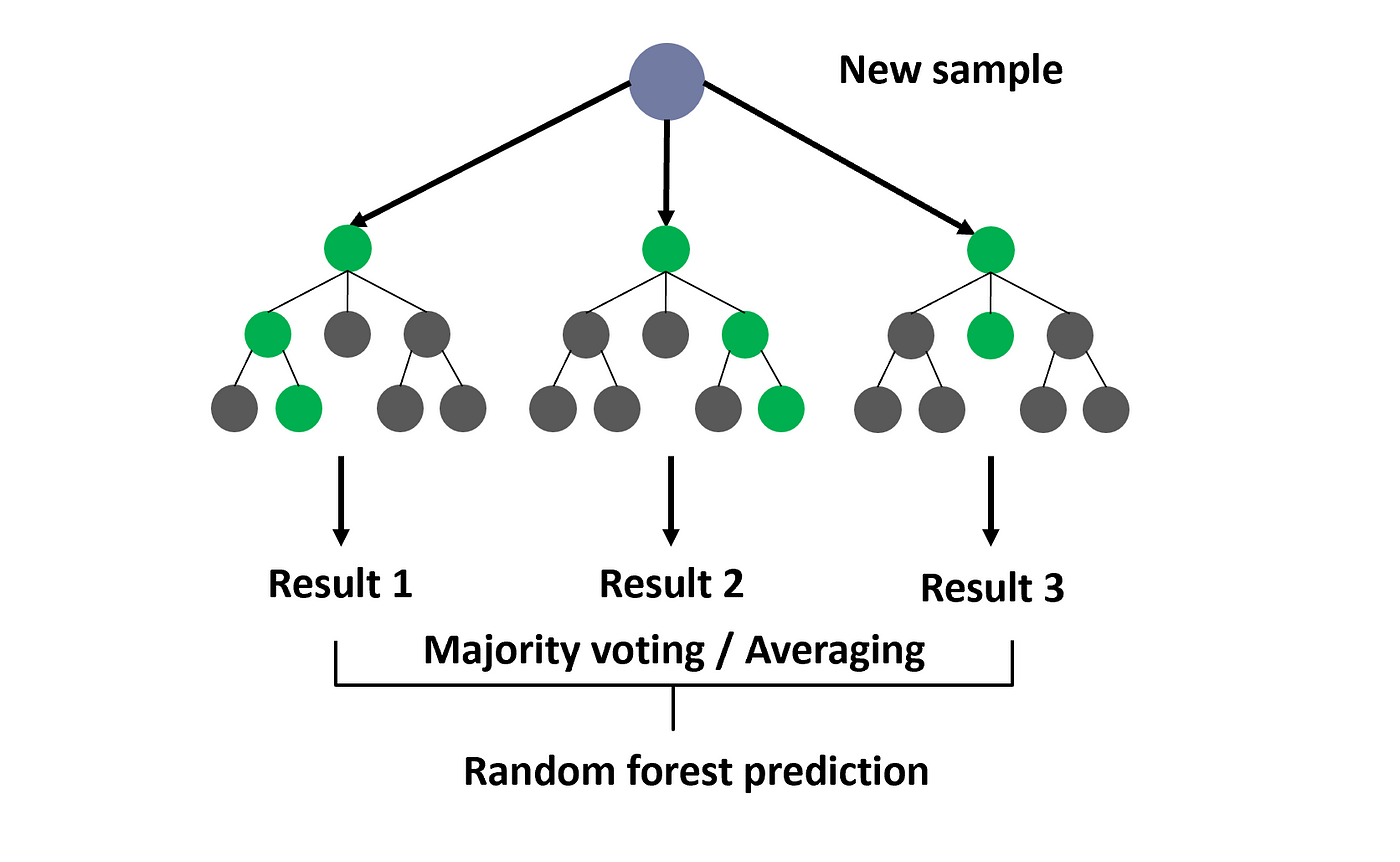

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
dtc.score(x_test, y_test)

0.7012987012987013

Random Forest builds upon the concept of a Decision Tree but combines the predictions of many trees to improve accuracy and reduce the risk of overfitting. It's like consulting a panel of experts instead of just one to make a decision, where each tree in the forest votes, and the most popular outcome becomes the model's prediction.

For more information: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
rfc.score(x_test, y_test)

0.7489177489177489

### D. Guassian NB

Gaussian Naive Bayes applies Bayes' theorem with the assumption of Gaussian (normal) distribution of features. It calculates the probability of each category based on the feature values and chooses the category with the highest probability. This model is especially effective for classification tasks where features are continuous and normally distributed.

For more information: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
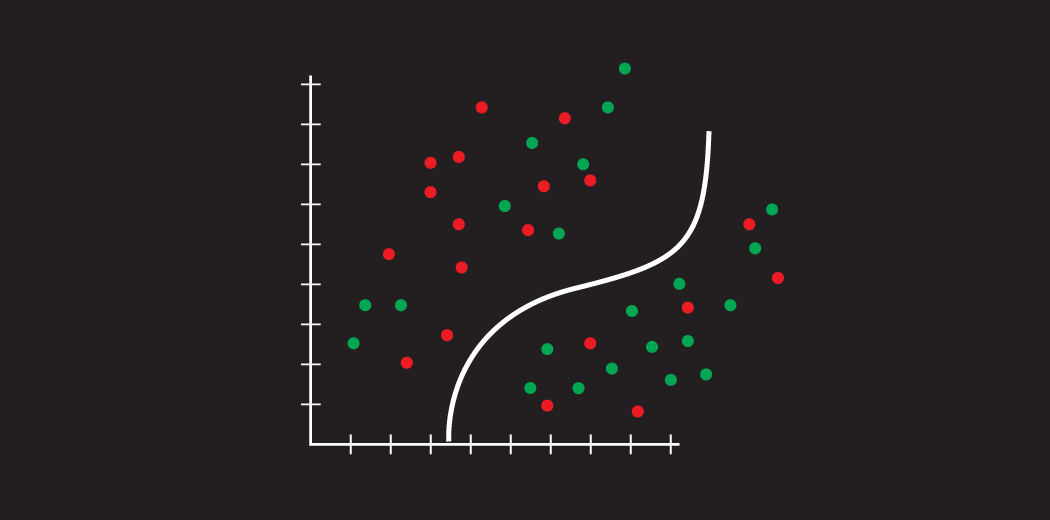

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [33]:
gnb.score(x_test, y_test)

0.7402597402597403

# **6. Result Visualization**

To visualize the results for different algorithms, I defined a function visualize, that takes the model and outputs important metrics. These are:

**Predict probability**: The predict_proba method outputs a probability distribution for each value. In the case of binary classification, which applies to this dataset, predict_proba will output two probabilities for each input; the probability it has an output of 0 and the probability it has an output of 1. For the sake of clarity, it wasn't printed in this function. For more info: https://towardsdatascience.com/predict-vs-predict-proba-scikit-learn-bdc45daa5972

**AUC (area under curve)**: The AUC refers to the Area Under the Receiver Operating Characteristic (ROC) Curve. This curve plots the true positive rate (TPR, also known as recall) against the false positive rate (FPR) at various threshold levels. The AUC value is a single scalar that summarizes the performance of a classifier across all possible thresholds, with a value of 1 representing a perfect classifier and a value of 0.5 representing a classifier that does no better than random guessing. For more info: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

**Confusion Matrix**: A confusion matrix is a table that visualizes the performance of a classification model by showing the actual versus predicted labels. It helps in understanding not only the errors made by the classifier but also the types of errors (false positives and false negatives). Here's an outline:
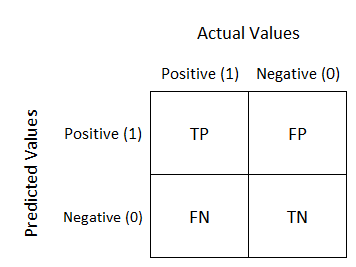

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
def visualize (modelName):
    
    # calculating the predict probability
    pred_test = modelName.predict_proba(x_test)[:, 1]
    pred_train = modelName.predict_proba(x_train)[:, 1]

    # calculate AUC of model
    test_auc = metrics.roc_auc_score(y_test, pred_test)
    train_auc = metrics.roc_auc_score(y_train, pred_train)

    # print results 
    print("\n")
    results = {modelName: {'test': test_auc, 'train': train_auc}}
    print(results)
    print(f'Confusion matrix: {confusion_matrix(y_test, modelName.predict(x_test))}')
    print("\n")

In [35]:
visualize(knn)
visualize(lr)
visualize(dtc)
visualize(rfc)
visualize(gnb)



{KNeighborsClassifier(n_neighbors=12): {'test': 0.783112582781457, 'train': 0.8906907273059806}}
Confusion matrix: [[128  23]
 [ 39  41]]




{LogisticRegression(random_state=42): {'test': 0.7977649006622516, 'train': 0.8570993111016278}}
Confusion matrix: [[124  27]
 [ 33  47]]




{DecisionTreeClassifier(random_state=42): {'test': 0.6774834437086092, 'train': 1.0}}
Confusion matrix: [[114  37]
 [ 32  48]]




{RandomForestClassifier(random_state=42): {'test': 0.8000827814569537, 'train': 1.0}}
Confusion matrix: [[120  31]
 [ 27  53]]




{GaussianNB(): {'test': 0.8006622516556291, 'train': 0.8288041821617997}}
Confusion matrix: [[119  32]
 [ 28  52]]




At first glance, it seems as if GaussianNB outperforms the other models. However, most of them were set up with default parameters, impacting their ability to accurately make predictions about the data (this isn't that large of an issue for GuassianNB due to the higher reliabilty of such default parameters). To fix this, we need to hypertune each parameter 

# **7. Hypertuning**

In [36]:
model_params = {
    'LR': {
        'max_iter': [800, 900, 1000],
        'C': [1.0, 10.0],
        'penalty': ['l2']
    },
    'KNN' : {
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2, 3], 
    },
    'DTC':{
        'criterion': ['gini', 'entropy'],
        'max_depth': [2, 3, 4, 5, 6, 7],
        'splitter' : ['best', 'random']
    },
    'RFC': {
        'max_features': ['log2', 'sqrt'],
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [2, 3, 4],
        'criterion': ['gini', 'entropy']
    },
    'GNB':{
        'var_smoothing': np.logspace(0,-9, num=100)
    }
}

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [38]:
def hypTune(model, param):
    scorer = metrics.make_scorer(metrics.roc_auc_score, needs_proba=True)
    new_mod = GridSearchCV(model, param_grid=param, scoring=scorer,
                         n_jobs=-1, cv=5, verbose=1)
    return new_mod

Now, let's test it out with a model, say Random Forest. 

In [39]:
# random forest
test_csv = hypTune(rfc, model_params["RFC"])
test_csv.fit(x_train, y_train)
print(f'RF Best params: {test_csv.best_params_}')
print(f'RF Best score: {test_csv.best_score_}')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
RF Best params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 300}
RF Best score: 0.8595170652836558


Whew! That took a while. However, notice how the score went from 80% to roughly 86%! To replicate and condense this, we'll develop a function to hypertune each model.

In [40]:
def hypertune(model, modelName):
    tune_csv = hypTune(model, model_params[modelName])
    tune_csv.fit(x_train, y_train)
    print("\n")
    print(modelName + f' Best params: {tune_csv.best_params_}')
    print(modelName + f' Best score: {tune_csv.best_score_}')
    return tune_csv.best_estimator_

In [41]:
from sklearn.base import clone

knn_tune = hypertune(clone(knn), "KNN")
lr_tune = hypertune(clone(lr), "LR")
dtc_tune = hypertune(clone(dtc), "DTC")
rfc_tune = hypertune(clone(rfc), "RFC")
gnb_tune = hypertune(clone(gnb), "GNB")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


KNN Best params: {'algorithm': 'auto', 'p': 2, 'weights': 'uniform'}
KNN Best score: 0.8482903351209986
Fitting 5 folds for each of 6 candidates, totalling 30 fits


LR Best params: {'C': 1.0, 'max_iter': 800, 'penalty': 'l2'}
LR Best score: 0.847194484448489
Fitting 5 folds for each of 24 candidates, totalling 120 fits


DTC Best params: {'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}
DTC Best score: 0.8121379535796012
Fitting 5 folds for each of 60 candidates, totalling 300 fits


RFC Best params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 300}
RFC Best score: 0.8595170652836558
Fitting 5 folds for each of 100 candidates, totalling 500 fits


GNB Best params: {'var_smoothing': 1.0}
GNB Best score: 0.8285202135774219


# **8. Conclusion**

Congrats on sticking through the whole way! Here are some important key observations:
- The Random Forest Classifier had the highest AUC score (roughly 86%) among all other models, closely followed by KNN and LR
- Most algorithms have an AUC of above 80%, which means they are fairly reliable
- However, much work could be done to further optimize the algorithm as well as modify the data to produce the best results possible!